## 1 - Packages 
First, let's run the cell below to import all the packages that you will need during this project.

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from autils import *

### 2 - Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

In [16]:
X, y = load_data()

### 3 - Visualizing the Data

In [17]:
print(f"The First Element Of X Is: {X[0]}")

the first element of X is: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

In [24]:
print(f"The First Element of Y Is: {y[0, 0]}") #y[row, column]
print(f"The Last Element of Y Is: {y[-1, 0]}\n")
print(f"The Shape of X is: {X.shape}")
print(f"The Shape of y is: {y.shape}")

The First Element of Y Is: 0
The Last Element of Y Is: 9

The Shape of X is: (5000, 400)
The Shape of y is: (5000, 1)


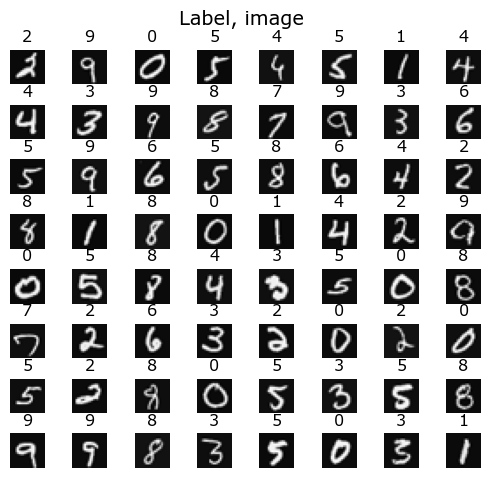

In [70]:
m, n = X.shape

fig, axes = plt.subplots(8, 8, figsize = (5,5))
fig.tight_layout(pad = 0.13)

fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    #Select a random number
    random_index = np.random.randint(m)
    # Select rows corresponding to the random indices and reshape the array and image
    X_random_reshape = X[random_index].reshape((20,20)).T

    # Display the image
    ax.imshow(X_random_reshape, cmap = "gray")

    # Display the label above the image
    ax.set_title(y[random_index, 0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)
plt.show()

### 4 - Tensorflow Model Implementation


In [48]:
model = Sequential(
    [
        tf.keras.Input((400,)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(10, activation = 'linear')], 
        name = "Handwritten_Digit_Model"
)

In [50]:
model.summary()

Model: "Handwritten_Digit_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [55]:
[layer1, layer2, layer3] = model.layers

# Weights shapes
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

print(f"W1 Shape = {W1.shape} , B1 Shape = {b1.shape}")
print(f"W2 Shape = {W2.shape} , B2 Shape = {b2.shape}")
print(f"W3 Shape = {W3.shape} , B3 Shape = {b3.shape}")

W1 Shape = (400, 25) , B1 Shape = (25,)
W2 Shape = (25, 15) , B2 Shape = (15,)
W3 Shape = (15, 10) , B3 Shape = (10,)


In [59]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001))

history = model.fit(X, y, epochs = 40)

Epoch 1/40
157/157 [==============================] - 0s 1ms/step - loss: 3.8492e-06
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 1.6281e-06
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 1.0354e-06
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 8.8778e-07
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 5.9162e-07
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 3.9601e-07
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 3.0563e-07
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 2.5742e-07
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 2.1906e-07
Epoch 10/40
157/157 [==============================] - 0s 1ms/step - loss: 1.9069e-07
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 1.6799e-07
Epoch 12/40
157/157 [==============================] - 0s 1ms/s

#### Prediction 
To make a prediction, use Keras `predict`. Below, X[1015] contains an image of a two.

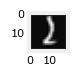

1/1 [==============================] - 0s 15ms/step
predicting a Two : [[-17.709951   15.915591   34.611504   14.311445  -23.69941   -22.78191
   -3.9173174 -12.883059   -1.779955  -14.607571 ]]

 Largest Prediction index: 2


In [63]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1, 400))

print(f"predicting a Two : {prediction}\n") 
print(f" Largest Prediction index: {np.argmax(prediction)}") # is used in Python with the NumPy library to find the index of the maximum value in an array called prediction

In [64]:
prediction_G = tf.nn.softmax(prediction)

print(f"predicting a Two. probability vector: \n{prediction_G}")
print(f"Total of predictions = {np.sum(prediction_G):0.3f}")

predicting a Two. probability vector: 
[[1.8926922e-23 7.5939699e-09 1.0000000e+00 1.5268511e-09 4.7412429e-26
  1.1867445e-25 1.8498907e-17 2.3625151e-21 1.5681571e-16 4.2114113e-22]]
Total of predictions = 1.000


In [65]:
yhat = np.argmax(prediction_G)
print(f"Largest prediction = {yhat}")

Largest prediction = 2


### Plot the Prediction and Expected Value

1/1 [==============================] - 0s 15ms/step


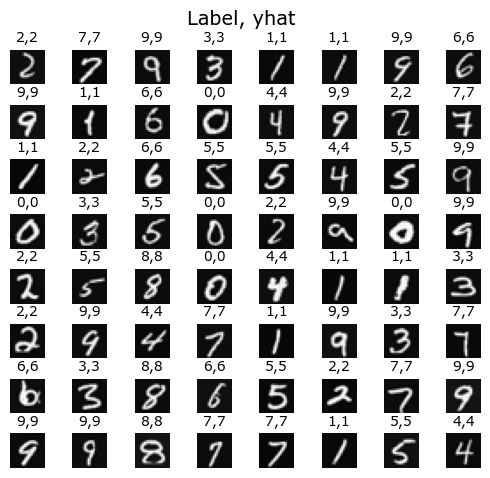

In [68]:
m ,n = X.shape

fig, axes = plt.subplots(8, 8, figsize = (5,5))
fig.tight_layout(pad = 0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):

    random_index = np.random.randint(m)

    X_random_reshape = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshape, cmap = 'gray')

    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_G = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_G)

    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()